In [75]:
import numpy as np
from PIL import Image, ImageOps
from IPython.display import display 
from math import inf
import itertools

# Referenzbogen: Bogen1.jpg
ref_bogen = Image.open("./Evaluationshelfer_Daten/boegen/Bogen1.jpg")


reference_corner_positions = [
    [1127, 381], # upper left
    [2313, 372], # upper right
    [2311, 2741], # lower right
    [1125, 2746] # lower left
]


# Contains Reference Values for positions of checkboxes (dimension 65x65)
reference_checkbox_positions = [
    [[1243+ x*233, 796] for x in range(0, 5)],
    [[1243+ x*233, 884] for x in range(0, 5)],
    [[1243+x*233, 989] for x in range(0, 5)],
    [[1243+x*233, 1143] for x in range(0, 5)],
    [[1243+x*233, 1283] for x in range(0, 5)],
    [[1243+x*233, 1418] for x in range(0, 5)],
    [[1243+x*233, 1608] for x in range(0, 5)],
    [[1243+x*233, 1728] for x in range(0, 5)],
    [[1243+x*233, 1848] for x in range(0, 5)],
    [[1243+x*233, 2043] for x in range(0, 5)],
    [[1243+x*233, 2131] for x in range(0, 5)],
    [[1243+x*233, 2316] for x in range(0, 5)],
    [[1213, 2524], [1383, 2522], [1593, 2522], [1853, 2523], [2183, 2521]],
    [[1243+x*233, 2706] for x in range(0, 5)]]

Frage  1  - Box  0


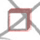

Frage  1  - Box  1


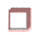

Frage  1  - Box  2


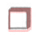

Frage  1  - Box  3


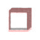

Frage  1  - Box  4


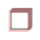

Frage  2  - Box  0


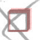

Frage  2  - Box  1


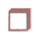

Frage  2  - Box  2


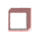

Frage  2  - Box  3


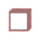

Frage  2  - Box  4


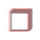

Frage  3  - Box  0


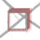

Frage  3  - Box  1


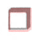

Frage  3  - Box  2


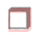

Frage  3  - Box  3


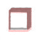

Frage  3  - Box  4


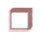

Frage  4  - Box  0


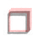

Frage  4  - Box  1


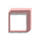

Frage  4  - Box  2


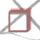

Frage  4  - Box  3


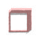

Frage  4  - Box  4


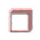

Frage  5  - Box  0


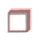

Frage  5  - Box  1


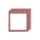

Frage  5  - Box  2


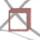

Frage  5  - Box  3


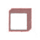

Frage  5  - Box  4


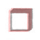

Frage  6  - Box  0


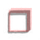

Frage  6  - Box  1


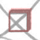

Frage  6  - Box  2


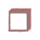

Frage  6  - Box  3


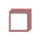

Frage  6  - Box  4


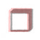

Frage  7  - Box  0


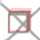

Frage  7  - Box  1


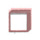

Frage  7  - Box  2


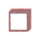

Frage  7  - Box  3


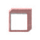

Frage  7  - Box  4


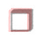

Frage  8  - Box  0


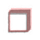

Frage  8  - Box  1


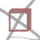

Frage  8  - Box  2


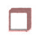

Frage  8  - Box  3


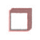

Frage  8  - Box  4


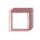

Frage  9  - Box  0


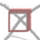

Frage  9  - Box  1


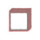

Frage  9  - Box  2


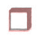

Frage  9  - Box  3


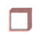

Frage  9  - Box  4


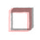

Frage  10  - Box  0


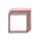

Frage  10  - Box  1


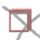

Frage  10  - Box  2


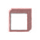

Frage  10  - Box  3


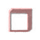

Frage  10  - Box  4


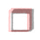

Frage  11  - Box  0


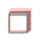

Frage  11  - Box  1


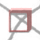

Frage  11  - Box  2


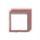

Frage  11  - Box  3


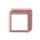

Frage  11  - Box  4


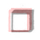

Frage  12  - Box  0


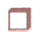

Frage  12  - Box  1


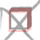

Frage  12  - Box  2


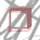

Frage  12  - Box  3


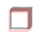

Frage  12  - Box  4


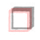

Frage  13  - Box  0


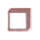

Frage  13  - Box  1


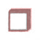

Frage  13  - Box  2


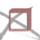

Frage  13  - Box  3


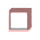

Frage  13  - Box  4


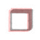

Frage  14  - Box  0


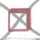

Frage  14  - Box  1


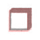

Frage  14  - Box  2


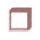

Frage  14  - Box  3


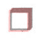

Frage  14  - Box  4


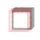

In [76]:
# Gives preview of all cropped Checkboxes
def show_all_checkboxes(overlay=True):
    for frage in range(0, 14):
        for box in range(len(reference_checkbox_positions[frage])):
            x, y = reference_checkbox_positions[frage][box]
            print("Frage ", frage+1, " - Box ", box)
            if overlay:
                foreground = ref_bogen.crop((x, y, x+65, y+65)).resize((40, 40)).convert('RGBA')
                background = reference_box_red().convert('RGBA')
                
                foreground.putalpha(127)

                display(Image.alpha_composite(background, foreground))
                #display(ref_bogen.crop((x, y, x+50, y+50))).resize((40, 40))
            else:
                display(ref_bogen.crop((x, y, x+50, y+50)).resize((40, 40)))
    return

def reference_box_red():
    box_image = ImageOps.grayscale(Image.open("./Evaluationshelfer_Daten/crosses/work_type_empty/P_0.0000___A3cz67pa0001.jpg__126.png"))  
    box_image_red = ImageOps.colorize(box_image, "red", "white")   
    box_image_red.putalpha(127)   
    return box_image_red
    
# Gives preview of all cropped Corners
def show_all_corners(corner_positions, bogen_no):
    bogen_img = Image.open("./Evaluationshelfer_Daten/boegen/Bogen"+str(bogen_no)+".jpg")
    for corner in range(4):
        x, y = corner_positions[corner]
        display(bogen_img.crop((x, y, x+52, y+52)))       
show_all_checkboxes()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


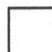

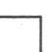

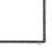

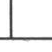

In [3]:
# Returns 'difference' between two images
def image_difference(image_a, image_b):
    width, height = min(image_a.size[0], image_b.size[0]), min(image_a.size[1], image_b.size[1])
    # Crop both images to same size and convert to grayscale
    image_a = ImageOps.grayscale(image_a.crop((0, 0, width, height)))
    image_b = ImageOps.grayscale(image_b.crop((0, 0, width, height)))
    
    # Numpy macht Sachen schneller
    image_a_matrix = np.asarray(image_a, dtype="double")
    image_b_matrix = np.asarray(image_b, dtype="double")
    
    assert image_a_matrix.shape == image_b_matrix.shape, "Image-Matricies don't have same shape"
    
    return np.sum((image_a_matrix - image_b_matrix)**2)

def corner_no_to_reference_image(corner_no):
    corner_map = {
        0: "ul.png",
        1: "ur.png",
        2: "lr.png",
        3: "ll.png"
    }
    return corner_map[corner_no]

def find_corner_position(bogen_img, corner_no, radius):
    search_center = reference_corner_positions[corner_no]
    search_positions = itertools.product(*[range(p-radius, p+radius) for p in search_center])

    best_match_value = inf
    beast_match_pos = [0, 0]
    
    corner_img = Image.open("./Evaluationshelfer_Daten/masks/"+corner_no_to_reference_image(corner_no))
    
    for pos in search_positions:
        cropped_bogen = bogen_img.crop((pos[0], pos[1], pos[0]+100, pos[1]+100)) # gets cropped again anyways
        match_val = image_difference(cropped_bogen, corner_img)
        if match_val < best_match_value:
            best_match_pos = pos
            best_match_value = match_val
    return best_match_pos
                
def find_corner_positions(bogen_no, radius=30):
    corner_positions = []
    
    for corner_no in range(4):
        bogen_img = Image.open("./Evaluationshelfer_Daten/boegen/Bogen"+str(bogen_no)+".jpg")
        corner_positions.append(find_corner_position(bogen_img, corner_no, radius))
        
    return corner_positions

show_all_corners(find_corner_positions(26), 26)
    

1217.0901736576088 2526.5410419449695


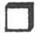

In [7]:
import scipy as sp
from scipy import optimize

def generateC(p_d, p):
    return np.matrix([
        [p_d[0][0], p_d[0][1], 0, 0, 1, 0],
        [p_d[1][0], p_d[1][1], 0, 0, 1, 0],
        [p_d[2][0], p_d[2][1], 0, 0, 1, 0],
        [p_d[3][0], p_d[3][1], 0, 0, 1, 0],
        [0, 0, p_d[0][0], p_d[0][1], 0, 1],
        [0, 0, p_d[1][0], p_d[1][1], 0, 1],
        [0, 0, p_d[2][0], p_d[2][1], 0, 1],
        [0, 0, p_d[3][0], p_d[3][1], 0, 1],
    ], dtype="double")

def generateD(p):
    return np.asarray([
        [p[0][0]],
        [p[1][0]],
        [p[2][0]],
        [p[3][0]],
        [p[0][1]],
        [p[1][1]],
        [p[2][1]],
        [p[3][1]],
    ], dtype="double")

# Calculate epsilon like specified
def epsilon(x, big_C, big_D):
    return (((big_C*np.asmatrix(x).transpose()- big_D).A1)**2).sum()

# Transform pos like specified
def phi(pos, x_Ab):
    return np.asarray([x_Ab[0]*pos[0]+x_Ab[1]*pos[1]+x_Ab[4], x_Ab[2]*pos[0]+x_Ab[3]*pos[1]+x_Ab[5]])



def get_sheet_transformation(bogen_no):
    p = find_corner_positions(bogen_no)
    C = generateC(reference_corner_positions, p)
    d = generateD(p)
    
    res = sp.optimize.minimize(epsilon, [1, 0, 0, 1, 0, 0], args=(C, d), method="Powell", tol=0.001)
    
    return res.x

# Alles was, 'Aufgabe (Kästchen finden)' verlangt.
def get_any_checkbox(bogen_no, x_Ab, question_no, rating):

    bogen_img = Image.open("./Evaluationshelfer_Daten/boegen/Bogen"+str(bogen_no)+".jpg")
    
    reference_pos = reference_checkbox_positions[question_no][rating]
    
    t_x, t_y = phi(reference_pos, x_Ab)
    
    print(t_x, t_y)
    
    return bogen_img.crop((round(t_x), round(t_y), t_x+50, t_y+50)).resize((40, 40))

get_any_checkbox(4, get_sheet_transformation(4), 12, 0)
    

